# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание проекта

Проект по исследованию объявлений о продаже квартир.
Целью исследования является определение реальной рыночной стоимости квартир.
План исследования:
1. Изучение общей информации о данных
2. Предобработка данных
3. Исследовательский анализ данных:
   - изучение параметров; 
   - изучение зависимостей между параметрами
4. Оформление общего вывода


### Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [7]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


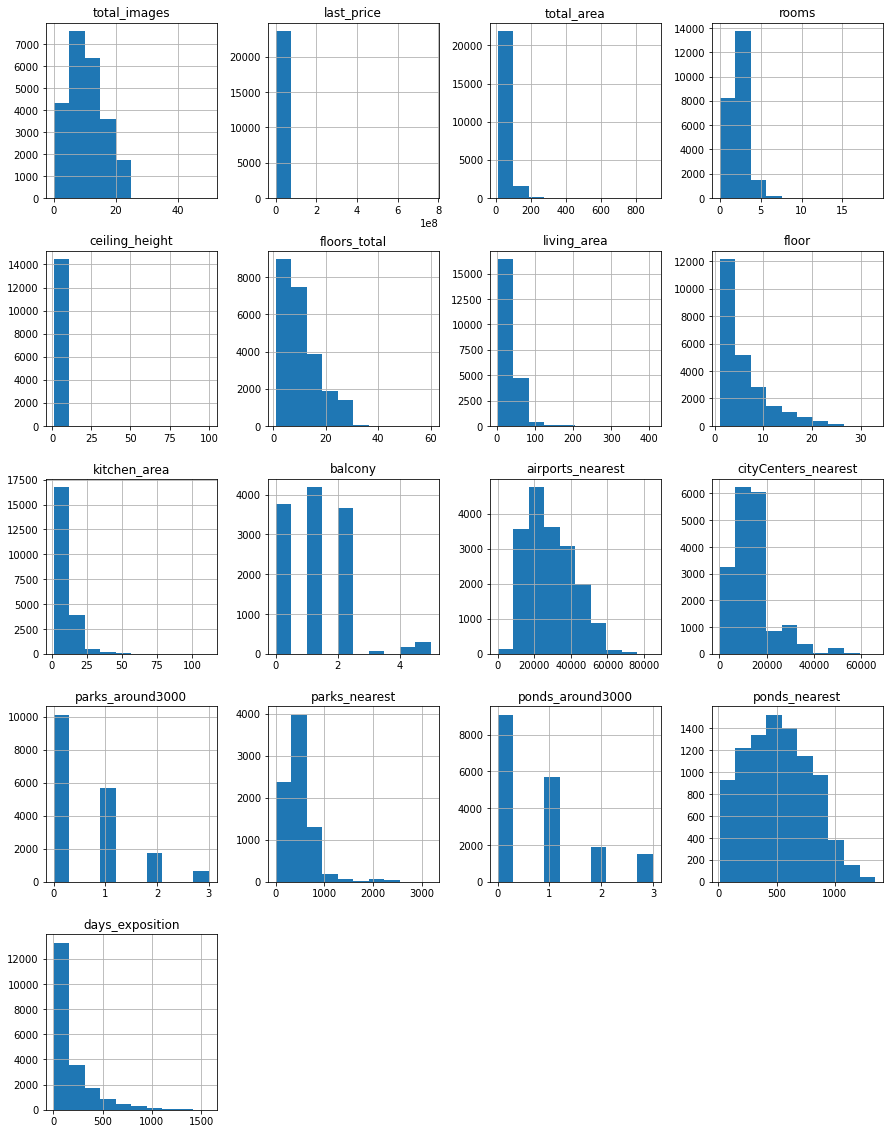

In [3]:
data.hist(figsize=(15, 20));

*Вывод:* В данных цен на момент снятия с публикации, количества комнат,жилой площади в кв.м., числа балконов,расстояния до ближайшего аэропорта в метрах (м), расстояние до центра города (м),числа водоёмов в радиусе 3 км ,число парков в радиусе 3 км,расстояние до ближайшего парка (м),сколько дней было размещено объявление (от публикации до снятия) есть нулевые значения. В данных есть пропуски и несоответствующие типы, например, число парков и водоемов логичнее выразить в целых числах. 

### Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

*Вывод*: 
1. Наибольшее количество пропусков в данных апартаменты, что может быть связано с тем, что при подаче объявлений большинство владельцев не придают этому показателю большого значения, возможно не знают критерии отнесения квартир к апартаментам. А владельцы апартаментов, точно зная категорию своей собственности, ее указывают. Поэтому можно заменить пропуски можно заменить на булево значение.
2. Примерно схожее количество пропусков  в указании расстояния до ближайшего аэропорта, центра города,  водоёма и парка - показателей, которые указываются автоматически на основе картографических данных, может быть вызвано отсутствием указанных объектов вблизи недвижимости, например, в сельской местности. Можно не трогать эти данные, т.к. для анализа они второстепенны. 
3. Пропуски в расстояниях до ближайших водоема и парка могут быть обусловлены тем, что рядом с объектом нет ближайших водоемов и парков. 
4. Пропуски в таких показателях как высота потолков, жилая площадь в кв. м., площадь кухни в кв. м. и всего этажей в доме могут быть обусловлены тем, что владельцы недвижимости не сочли важным указать эти данные, а возможно и не знают их. Данные, где не указана этажность, можно удалить, а в показателях площади оставим пропуски.  
5. Настораживает наличие пропусков в названиях населенных пунктах, возможно данные записи ошибочны и можно их удалить.
6. Наличие пропусков в сроках размещения объявления, может говорить об ошибках в данных, но так как данных много (13%), не будем их удалять.


In [5]:
data['balcony'] = data['balcony'].fillna(value=0)
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ceiling_height'].fillna(data['ceiling_height'].mean(), inplace=True)
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
# меняем типы данных с следующих столбцах:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

*Вывод*:
1. Дату публикации меняем на тип данных даты;
2. Число этажей, балконов, парков, водоемов  может быть только целым.

In [9]:
#узнаем уникальные названия населенных пунктов
data['locality_name'].unique()




array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
#количество уникальных названий:
data['locality_name'].value_counts()

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
                     ...  
поселок Кирпичное        1
деревня Иссад            1
посёлок Сумино           1
деревня Шпаньково        1
деревня Хязельки         1
Name: locality_name, Length: 364, dtype: int64

In [11]:
#устраняем неявные дубликаты: убираем типы населенных пунктов в названиях:

data['locality_name'] = (
    data['locality_name'].replace(['поселок ','посёлок ','садоводческое некоммерческое товарищество ', 'городской ','при железнодорожной ','станции ', 'городского типа ', 'деревня ', 'коттеджный ','садовое товарищество ','село '],'', regex=True)
) 
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [12]:
#количество уникальных названий после удаления:
data['locality_name'].value_counts()

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
                   ...  
Вахнова Кара           1
Левашово               1
Большой Сабск          1
Кисельня               1
Корнево                1
Name: locality_name, Length: 305, dtype: int64

*Вывод*: В результате удаления типов населенных пунктов их количество уменьшилось с 364 до 305.


### Посчитайте и добавьте в таблицу новые столбцы

In [13]:
# рассчитаем цену одного квадратного метра и добавим в таблицу новый столбец:
data ['price_sqm'] =round(data ['last_price']/data ['total_area'],2)

# определим день недели публикации объявления:
data['weekday'] = data['first_day_exposition'].dt.weekday

# определим месяц публикации объявления:
data['month'] = data['first_day_exposition'].dt.month

# определим год публикации объявления:
data['year'] = data['first_day_exposition'].dt.year

# определим тип этажа квартиры:
def floor_(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_, axis=1)

# определим расстояние до центра города в килшометрах:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

####  Изучение параметров 

In [14]:
# удалим сильно отклоняющиеся значения:
col = ['ceiling_height', 'cityCenters_nearest', 'floors_total', 
       'kitchen_area', 'last_price', 'living_area', 'parks_nearest','rooms', 
        'total_area']
data_clean = data.copy()
for column in col:
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_clean.loc[(data_clean[column] < lower_bound) | (data_clean[column] > upper_bound), column] = None
    
data_clean = data_clean.dropna(how='all')    
 

data_clean.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,cityCenters_nearest_km
count,23565.000000,2.151900e+04,22326.000000,23475.000000,22033.000000,23533.000000,20930.000000,23565.000000,20161.000000,23565.000000,...,23565.000000,7719.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,4.837115e+06,54.319704,2.047796,2.703062,10.640930,31.544592,5.878124,9.504972,0.593677,...,0.468831,440.516388,0.589900,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,14.186504
std,5.681156,2.215774e+06,19.331030,1.006547,0.130367,6.527996,13.934545,4.871485,3.132379,0.960660,...,0.748403,215.857536,0.883966,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,8.621131
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,...,0.000000,281.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,441.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.771499,16.000000,41.000000,8.000000,11.100000,1.000000,...,1.000000,592.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.186686e+07,114.200000,6.000000,3.020000,29.000000,77.800000,33.000000,19.500000,5.000000,...,3.000000,1098.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


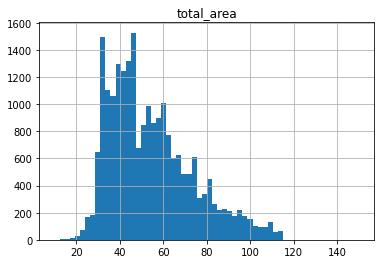

In [15]:
#построим гистограмму:
data_clean.hist('total_area',bins=60, range=(10,150));

**Вывод**: Большинство объектов недвижимости имеют общую площадь до 100 кв.м. 

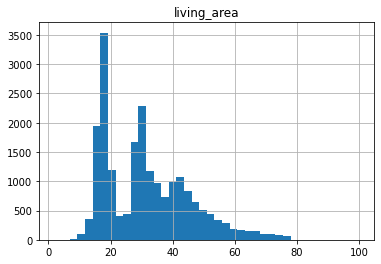

In [16]:
data_clean.hist('living_area',bins=40, range=(2,100));

**Вывод**: Большинство объектов недвижимости имеют жилую площадь до 55 кв.м. 

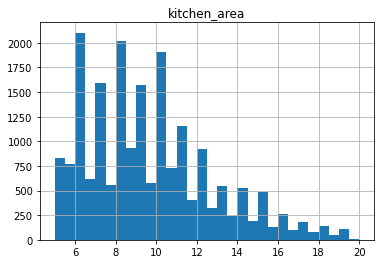

In [17]:
data_clean.hist('kitchen_area',bins=30, range=(5,20));

**Вывод**: Большинство объектов недвижимости имеют площадь кухни до 15 кв.м. 

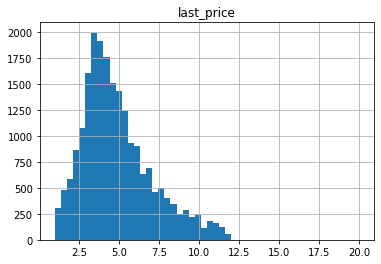

In [18]:
data_clean['last_price'] = data_clean['last_price'].apply(lambda x: x/1000000)
data_clean.hist('last_price',bins=50, range=(1,20));

**Вывод**: Средняя стоимость проданных объектов недвижимости составляла 6,5 млн. руб. 

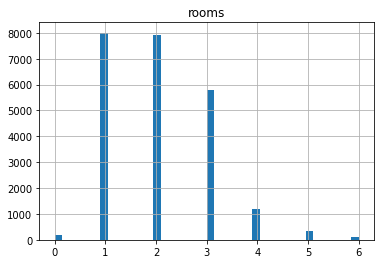

In [19]:
data_clean.hist('rooms',bins=40, range=(0,6));

**Вывод**: Большинство объектов недвижимости  имеют 1-2 комнаты. Есть объекты, где указано ноль комнат.

In [20]:
data['ceiling_height'].sort_values(ascending=False).head(10)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
20478     27.0
10773     27.0
4876      27.0
22938     27.0
21824     27.0
5246      27.0
Name: ceiling_height, dtype: float64

**Вывод**: Средняя высота потолков в объектах недвижимости 2.7 м. Есть объекты с аномальной высотой 100 м. и объекты с высотой 32 м. и 27 м. Логично предположить, что на самом деле это вещественные значения: 2.7 м и 3.2 м.

In [21]:
#Поменяем аномальные значение высоты потолков:
for i in data['ceiling_height']:
     if i >= 20:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})
data['ceiling_height'].sort_values(ascending=False).head(10)

15061    14.0
22309    10.3
22869    10.0
5863      8.3
15743     8.0
3474      8.0
17442     8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64

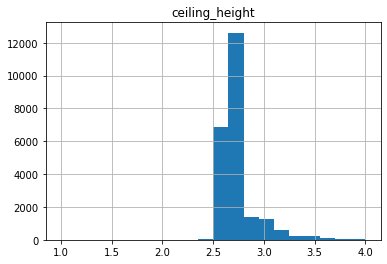

In [22]:
data.hist('ceiling_height',bins=20, range=(1,4));

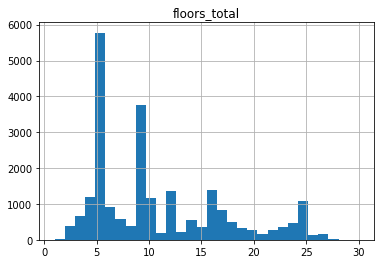

In [23]:
data_clean.hist('floors_total',bins=30, range=(1,30));

**Вывод**: Среднее количество этажей в домах 16. 

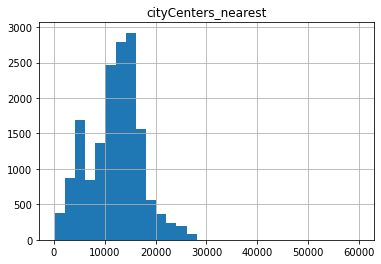

In [24]:
data_clean.hist('cityCenters_nearest',bins=30, range=(150,60000));

**Вывод**: В среднем расстояние о центра города составляет 14 км. Есть значения свыше 50 км., возможно расстояние указано из другого населенного пункта до  центра ближайшего города.

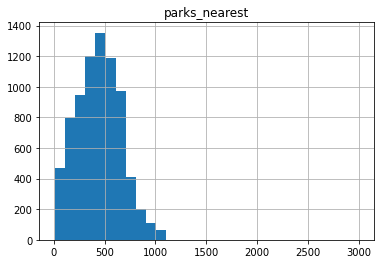

In [25]:
data_clean.hist('parks_nearest',bins=30, range=(10,3000));

**Вывод**: В среднем расстояние до парка составляет 500 м. 

In [26]:
data['floor_type'].value_counts()


другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64

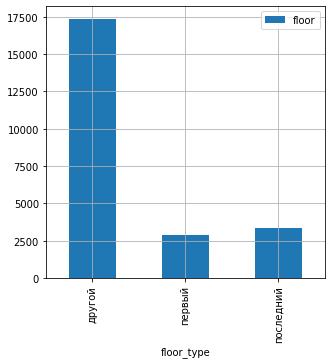

In [27]:
data.pivot_table(index='floor_type', values='floor', aggfunc='count') .plot(grid=True,kind ='bar', figsize=(5, 5));

**Вывод**: Большинство объектов недвижимости расположены не на первом и не на последнем этажах.

In [28]:
data['last_price'] = data['last_price'].apply(lambda x: x/1000000)
data['last_price'].describe()



count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

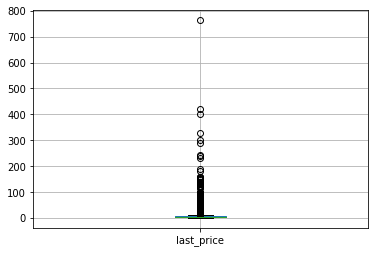

In [29]:
data.boxplot(column=['last_price']);

In [30]:
data_clean['last_price'].describe()


count    21519.000000
mean         4.837115
std          2.215774
min          0.012190
25%          3.300000
50%          4.400000
75%          5.999999
max         11.866860
Name: last_price, dtype: float64

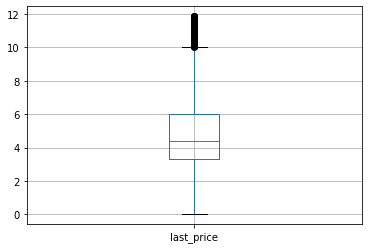

In [31]:
data_clean.boxplot(column=['last_price']);

In [32]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

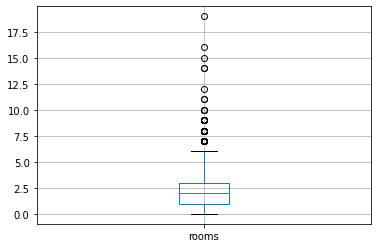

In [33]:
data.boxplot(column=['rooms']);

In [34]:
data_clean['rooms'].describe()

count    23475.000000
mean         2.047796
std          1.006547
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

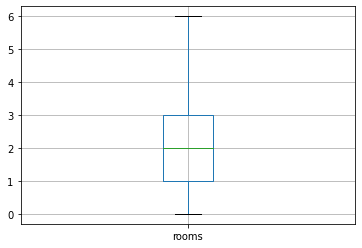

In [35]:
data_clean.boxplot(column=['rooms']);

In [36]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

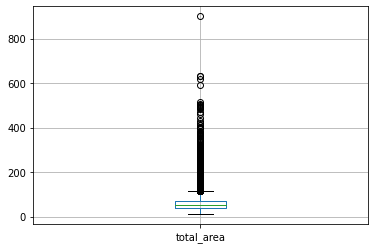

In [37]:
data.boxplot(column=['total_area']);

In [38]:
data_clean['total_area'].describe()

count    22326.000000
mean        54.319704
std         19.331030
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

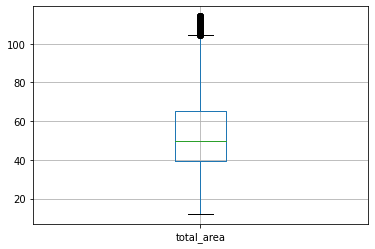

In [39]:
data_clean.boxplot(column=['total_area']);

In [40]:
data_clean.shape[0] / data.shape[0]

1.0

In [54]:
data_clean.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,cityCenters_nearest_km
count,23565.000000,21519.000000,22326.000000,23475.000000,22033.000000,23533.000000,20930.000000,23565.000000,20161.000000,23565.000000,...,23565.000000,7719.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,4.837115,54.319704,2.047796,2.703062,10.640930,31.544592,5.878124,9.504972,0.593677,...,0.468831,440.516388,0.589900,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,14.186504
std,5.681156,2.215774,19.331030,1.006547,0.130367,6.527996,13.934545,4.871485,3.132379,0.960660,...,0.748403,215.857536,0.883966,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,8.621131
min,0.000000,0.012190,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000,39.400000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,...,0.000000,281.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.400000,50.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,441.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,5.999999,65.500000,3.000000,2.771499,16.000000,41.000000,8.000000,11.100000,1.000000,...,1.000000,592.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,11.866860,114.200000,6.000000,3.020000,29.000000,77.800000,33.000000,19.500000,5.000000,...,3.000000,1098.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


####  Как быстро продавались квартиры? 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

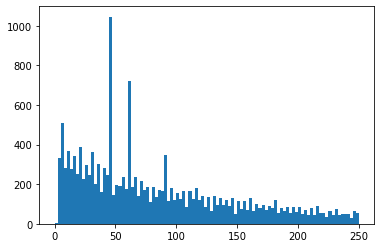

In [41]:
# пропущенные значения меняем на число, чтобы привести к типу целых чисел
data['days_exposition'].fillna(10000, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

round(data.query('days_exposition !=10000')['days_exposition'].median())
round(data.query('days_exposition != 10000')['days_exposition'].mean())

# строим гистрограмму

plt.hist(data.query('days_exposition != 10000')['days_exposition'], bins=100, range=(0,250))

# Изучаем значения срока продажи
data.query('days_exposition != 10000')['days_exposition'].describe()

*Вывод*: В среднем объекты недвижимости продаются за 180 дней, медианное значение меньше 95 дней. Быстрой можно назвать продажу до 10 дней, необычно долгой - свыше 4 лет.  

####  Факторы, влияющие на общую стоимость объекта

In [42]:
#data_clean[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday','month','year']].corr()

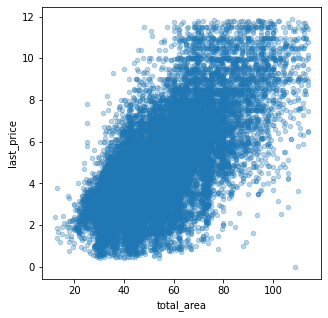

In [43]:
data_clean.plot(x='total_area', y='last_price', kind='scatter',alpha=0.3, figsize=(5, 5));

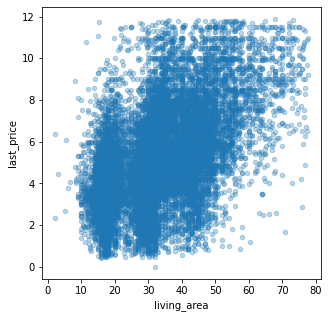

In [44]:
data_clean.plot(x='living_area', y='last_price', kind='scatter',alpha=0.3, figsize=(5, 5));

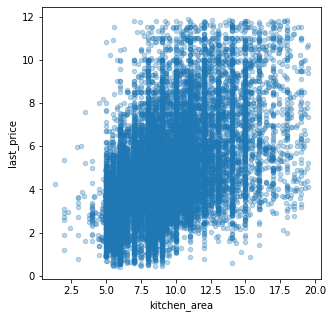

In [45]:
data_clean.plot(x='kitchen_area', y='last_price', kind='scatter',alpha=0.3, figsize=(5, 5));

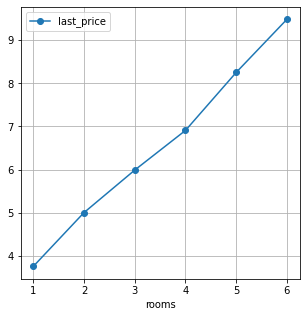

In [46]:
data_clean.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5));

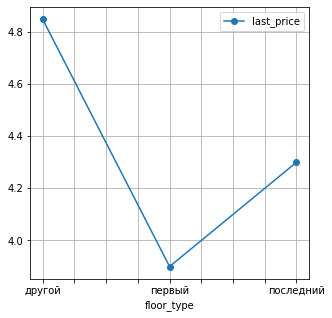

In [47]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5));

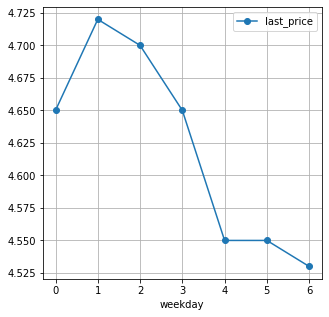

In [48]:
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5));

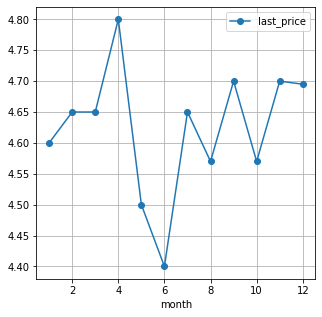

In [49]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5));

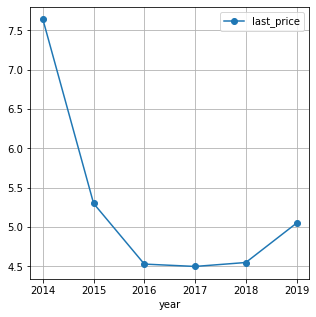

In [50]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5));

*Вывод*: Самая высокая зависимость среди рассматриваемых факторов, влияющих на стоимость квартиры, между ценой и общей площадью квартиры и количеством комнат, т.е. чем больше площадь и чем больше комнат в квартире, тем выше цена. Самые низкие цены у квартир на первом этаже. И цена квартиры незначительно, но зависит от срока продажи, чем дольше продается квартира, чем ниже ее цена.
Выше цена квартир, которые продают с понедельника по четверг. Ниже всех цены на квартиры в июне. 
Цены продаваемых квартир 2014 году были самые высокими в рассматриваемом периоде, после прозошло значительно снижение цен, которое продолжалось до 2019 года.  


#### Расчет средней цены 1 кв. м. в 10 населенных пунктах

In [51]:
data.groupby('locality_name').agg({'first_day_exposition':'count','price_sqm':'median'}).sort_values(by='first_day_exposition',ascending=False).head(10)

,first_day_exposition,price_sqm
locality_name,,
Санкт-Петербург,15651,104774.540
Мурино,586,86250.375
Кудрово,470,95555.315
Шушары,439,76829.270
Всеволожск,398,65789.470
Пушкин,369,100000.000
Колпино,338,74723.745
Парголово,327,91642.860
Гатчина,307,67796.610


**Вывод**: Наибольшее количество объявлений вышло в Санкт-Петербурге, здесь и самая высокая стоимость 1 квадратного метра - 104774,54 руб. Среди 10 населённых пунктах с наибольшим числом объявлений самая низкая стоимость 1 кв.м. в Выборге - 58158,32 руб.

#### Изменение средней цены от расстояния до центра города

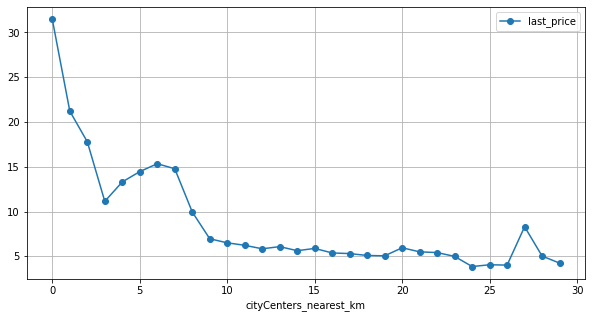

In [52]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, style='o-', figsize=(10, 5));

**Вывод**: Цены выше на квартиры, которые находятся в радиусе 7 км от центра города.

### Общий вывод

#### 1. Описание проекта:
На основании данных о размещенных объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет был проведен провести исследовательский анализ данных, который должен помочь установить параметры, влияющие на цену объектов.

#### 2. Порядок обработки аномалий, пропусков и дубликатов, предобработка данных для анализа:
В процессе ознакомления с данными было установлено наличие следующих аномалий: 
   1. Наличие пропусков в следующих данных:
 - Наибольшее количество пропусков в данных апартаменты, что может быть связано с тем, что при подаче объявлений большинство владельцев не придают этому показателю большого значения, возможно не знают критерии отнесения квартир к апартаментам. А владельцы апартаментов, точно зная категорию своей собственности, ее указывают. Поэтому можно заменить пропуски можно заменить на булево значение.
 - Примерно схожее количество пропусков  в указании расстояния до ближайшего аэропорта, центра города,  водоёма и парка - показателей, которые указываются автоматически на основе картографических данных, может быть вызвано отсутствием указанных объектов вблизи недвижимости, например, в сельской местности. 
 - Пропуски в расстояниях до ближайших водоема и парка могут быть обусловлены тем, что рядом с объектом нет ближайших водоемов и парков. 
 - Пропуски в таких показателях как высота потолков, жилая площадь в кв. м., площадь кухни в кв. м. и всего этажей в доме могут быть обусловлены тем, что владельцы недвижимости не сочли важным указать эти данные, а возможно и не знают их. Данные, где не указана этажность, можно удалить, а площади оставить с пропусками.  
 - Настораживает наличие пропусков в названиях населенных пунктах, возможно данные записи ошибочны и можно их удалить.
 - Наличие пропусков в сроках размещения объявления, может говорить об ошибках в данных, но так как данных много (13%), не будем их удалять.
   2. Разное написание одних и тех же населенных пунктов.
   В результате удаления типов населенных пунктов их количество уменьшилось с 364 до 305.
   3. Слишком маленькие или большие значения некоторых показателей, например, высота потолка 100 м. или площадь квартиры 900 кв. м. 
   Сильно отличающиеся значения (выбросы) были удалены.
Для последующего анализа были рассчитаны показатели и добавлены новые столбцы в данные: 
 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - расстояние до центра города в километрах.
#### 3. Анализ:
В ходе анализа были сделаны следующие выводы:
 - большинство объектов недвижимости имеют общую площадь до 100 кв.м., жилую площадь до 55 кв.м., площадь кухни до 15 кв.м.;
 - средняя стоимость проданных объектов недвижимости составляла 6,5 млн. руб.;
 - большинство объектов расположены не на первом и последнем этажах;
 - в среднем объекты недвижимости продаются за 180 дней, медианное значение меньше 95 дней. Быстрой можно назвать продажу до 10 дней, необычно долгой - свыше 4 лет;  
 - самая высокая зависимость среди рассматриваемых факторов, влияющих на стоимость квартиры, между ценой и общей площадью квартиры и количеством комнат, т.е. чем больше площадь и чем больше комнат в квартире, тем выше цена; 
 - самые низкие цены у квартир на первом этаже; 
 - цена квартиры незначительно, но зависит от срока продажи, чем дольше продается квартира, чем ниже ее цена;
 - выше цена квартир, которые продают с понедельника по четверг. Ниже всех цены на квартиры в июне. 
Цены продаваемых квартир 2014 году были самые высокими в рассматриваемом периоде, после произошло значительно снижение цен, которое продолжалось до 2019 года;  
 - наибольшее количество объявлений вышло в Санкт-Петербурге, здесь и самая высокая стоимость 1 квадратного метра - 104774,54 руб. Среди 10 населённых пунктах с наибольшим числом объявлений самая низкая стоимость 1 кв.м. в Выборге - 58158,32 руб;
 - в Санкт-Петербурге цены выше на квартиры, которые находятся в радиусе 7 км от центра города.

 